<a href="https://colab.research.google.com/github/whgustj00/MyFile/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_%ED%8C%80%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_5%ED%8C%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2000~2022년 자동차 스펙 별 연료 소비량과 CO2 배출량 분석
https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption?resource=download

데이터 세트는 캐나다에서 소매 판매되는 새로운 소형 차량에 대한 모델별 연료 소비 등급과 예상 이산화탄소 배출량을 제공합니다.

다양한 모델 연도의 차량을 비교하는 데 도움이 되도록 2000년부터 2022년 차량의 연료 소비 등급은 일상적인 운전을 더욱 대표하는 향상된 테스트를 반영하도록 조정되었습니다. 이는 차량 테스트가 아닌 원래 등급에서 생성된 대략적인 값입니다.

Open Canada Data 의 원본 데이터
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

In [5]:
# 필요한 패키지 설치

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
plt.rcParams['figure.dpi'] = 120

In [6]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [7]:
# 한글 폰트로 변경
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')


In [8]:
df = pd.read_csv("/content/Fuel_Consumption_2000-2022.csv")

# 데이터 샘플 확인
df.head()


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


YEAR: 자동차의 제조 연도

MAKE: 자동차 제조사

MODEL: 자동차 모델


VEHICLE CLASS: 자동차의 차량 종류

    (예시: Compact(소형) / Mid-size(중형) / Subcompact(소형) 등)

ENGINE SIZE: 자동차 엔진의 크기. 일반적으로 리터(L) 단위

CYLINDERS: 자동차 엔진의 실린더 수

TRANSMISSION: 자동차의 변속기 종류

    A = 자동 / AM = 자동 수동 / AS = 선택 시프트가 포함된 자동 / AV = 연속  변 / M = 수동 / 3 ~ 10 = 기어 수

FUEL: 자동차가 사용하는 연료 유형

    X = 일반 휘발유 / Z = 프리미엄 휘발유 / D = 디젤 / E = 에탄올(E85) / N = 천연가스

FUEL CONSUMPTION : 도시 주행 시 연비. 100킬로미터 당 리터(L/100 km)

HWY (L/100 km): 고속도로 주행 시 연비. 100 킬로미터 당 리터(L/100 km)

COMB (L/100 km): 도시 및 고속도로 복합 연비. 100 킬로미터 당 리터(L/100 km)

COMB (mpg): 도시 및 고속도로 복합 연비. 영국 갤런당 마일(mpg)

EMISSIONS: 자동차의 이산화탄소 배출량. 킬로미터 당 그램(g/km)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [10]:
# 결측치 확인
print(df.isnull().sum())

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


In [11]:
# 연료 유형 라벨 치환
df['FUEL'].replace({'X': '휘발유', 'Z': '고급 휘발유', 'D': '경유', 'E': '에탄올', 'N': '천연 가스'}, inplace=True)


In [12]:
# COMB (L/100 km)를 COMB (KM/L)로 변환하여 새로운 열 추가
df['COMB (KM/L)'] = 100 / df['COMB (L/100 km)']

# COMB (MPG) 열을 삭제
df.drop(columns=['COMB (mpg)'], inplace=True)


COMB (mpg) 드랍 및 COMB (KM/L) 대체 이유

1. 이 데이터셋에서는 복합연비(mpg)가 복합연비(L/100km)가 아닌 고속주행연비(L/100km)로 잘못 변환되어 데이터 왜곡 가능성이 있음.

2. 한국에서는 mi/g 보다 km/L를 자주 사용하기 때문에 COMB (mpg)를 드랍하고, COMB (KM/L) 열을 새로 생성

In [13]:
# 연비 변수들 구분하기 편하게 변환하여 열 추가 및 제거
df['HWY (KM/L)'] = 100 / df['HWY (L/100 km)']
df['CITY (KM/L)'] = 100/ df['FUEL CONSUMPTION']

df.drop(columns=['COMB (L/100 km)'], inplace=True)
df.drop(columns=['HWY (L/100 km)'], inplace=True)
df.drop(columns=['FUEL CONSUMPTION'], inplace=True)

df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,EMISSIONS,COMB (KM/L),HWY (KM/L),CITY (KM/L)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,휘발유,186,12.345679,14.925373,10.869565
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,휘발유,175,13.157895,15.384615,11.764706
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,고급 휘발유,230,10.000000,13.513514,8.196721
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,고급 휘발유,264,8.695652,10.869565,7.462687
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,휘발유,198,11.627907,14.285714,10.000000


마찬가지로, 변수명과 뜻 통일 및 한국식 표기를 위해 변수들을 변환

COMB (KM/L) : 복합 연비 (km/L)

HWY (KM/L) : 고속도로 주행 연비 (km/L)

CITY (KM/L) : 도심주행 연비 (km/L)

In [14]:
print(df['MAKE'].unique())

['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'BENTLEY'
 'ROLLS-ROYCE' 'MASERATI' 'MINI' 'MITSUBISHI' 'SMART' 'HUMMER'
 'ASTON MARTIN' 'LAMBORGHINI' 'BUGATTI' 'SCION' 'FIAT' 'RAM' 'SRT'
 'ALFA ROMEO' 'GENESIS' 'Acura' 'Alfa Romeo' 'Aston Martin' 'Audi'
 'Bentley' 'Bugatti' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Genesis' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce'
 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']


제조사명이 대소문자로 중복되어 있기 때문에 대문자로 통합한다

In [15]:
def integrate(class_name):
    # 대문자로 변환하고, 공백, 대쉬(-), 콜론(:) 제거
    class_name = class_name.upper().replace('-', '').replace(':', '').replace(' ', '')
    return class_name

# 제조사명 통합 적용
df['MAKE'] = df['MAKE'].apply(integrate)

# 결과 확인
print(df['MAKE'].unique())


['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LANDROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDESBENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'BENTLEY'
 'ROLLSROYCE' 'MASERATI' 'MINI' 'MITSUBISHI' 'SMART' 'HUMMER'
 'ASTONMARTIN' 'LAMBORGHINI' 'BUGATTI' 'SCION' 'FIAT' 'RAM' 'SRT'
 'ALFAROMEO' 'GENESIS']


모든 글자를 대문자로 변환하고 공백, 대쉬, 콜론을 제거하는 함수를 만들어 제조사 변수에 사용했다.

In [16]:
print(df['VEHICLE CLASS'].unique())

['COMPACT' 'MID-SIZE' 'SUBCOMPACT' 'STATION WAGON - MID-SIZE'
 'MINICOMPACT' 'TWO-SEATER' 'STATION WAGON - SMALL' 'FULL-SIZE' 'SUV'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD'
 'PICKUP TRUCK - SMALL' 'MINIVAN' 'SUV - STANDARD'
 'SPECIAL PURPOSE VEHICLE' 'SUV - SMALL' 'Compact' 'SUV: Small'
 'Two-seater' 'Mid-size' 'Minicompact' 'Subcompact' 'Station wagon: Small'
 'Full-size' 'SUV: Standard' 'Special purpose vehicle'
 'Pickup truck: Small' 'Pickup truck: Standard' 'Minivan' 'Van: Passenger'
 'Station wagon: Mid-size']


차량 클래스의 값이 공백, 대쉬, 콜론, 대소문자로 구분되어 통합할 필요가 있다.

In [17]:
# 차량 클래스 통합 적용
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].apply(integrate)

# 결과 확인
print(df['VEHICLE CLASS'].unique())


['COMPACT' 'MIDSIZE' 'SUBCOMPACT' 'STATIONWAGONMIDSIZE' 'MINICOMPACT'
 'TWOSEATER' 'STATIONWAGONSMALL' 'FULLSIZE' 'SUV' 'VANCARGO'
 'VANPASSENGER' 'PICKUPTRUCKSTANDARD' 'PICKUPTRUCKSMALL' 'MINIVAN'
 'SUVSTANDARD' 'SPECIALPURPOSEVEHICLE' 'SUVSMALL']


이전에 만들어둔 함수를 사용하여 통합했다.

In [18]:
# 'VEHICLE CLASS' 열 수정
df['VEHICLE CLASS'].replace({'SUVSTANDARD': 'SUV', 'STATIONWAGONMIDSIZE': 'WAGON', 'STATIONWAGONSMALL': 'WAGONSMALL'}, inplace=True)

# 결과 확인
print(df['VEHICLE CLASS'].unique())

['COMPACT' 'MIDSIZE' 'SUBCOMPACT' 'WAGON' 'MINICOMPACT' 'TWOSEATER'
 'WAGONSMALL' 'FULLSIZE' 'SUV' 'VANCARGO' 'VANPASSENGER'
 'PICKUPTRUCKSTANDARD' 'PICKUPTRUCKSMALL' 'MINIVAN'
 'SPECIALPURPOSEVEHICLE' 'SUVSMALL']


SUV와 SUV 스탠다드가 나눠져있어 통합했다.

스테이션 왜건은 한국에선 왜건이라고만 부르기 때문에 줄여줬다.

(SUVSTANDARD는 SUV로, STATIONWAGONMIDSIZE은 WAGON로, STATIONWAGONSMALL은 WAGONSMALL로 통합)

In [19]:
print(df['MODEL'].unique())

['1.6EL' '3.2TL' '3.5RL' ... 'V90 CC B6 AWD' 'XC60 B5 AWD' 'XC60 B6 AWD']


이전에 만들어둔 함수를 사용해 모델명도 통합해주었다.

(예시 SONATA, Sonata를 SONATA로 통합)

In [20]:
# 차량 이름 통합 적용
df['MODEL'] = df['MODEL'].apply(integrate)

# 결과 확인
print(df['MODEL'].unique())


['1.6EL' '3.2TL' '3.5RL' ... 'V90CCB6AWD' 'XC60B5AWD' 'XC60B6AWD']


In [21]:
# 조건에 따라 새로운 변수 생성
df.loc[(df['VEHICLE CLASS'] == 'SUBCOMPACT') & (df['ENGINE SIZE'] >= 2.0), 'VEHICLE CLASS'] = 'SPORTS'
df.loc[(df['VEHICLE CLASS'] == 'MINICOMPACT') & (df['ENGINE SIZE'] >= 2.0), 'VEHICLE CLASS'] = 'SPORTS'
df.loc[(df['VEHICLE CLASS'] == 'COMPACT') & (df['ENGINE SIZE'] >= 5.0), 'VEHICLE CLASS'] = 'PREMIUM'
df.loc[(df['VEHICLE CLASS'] == 'MIDSIZE') & (df['ENGINE SIZE'] >= 5.5), 'VEHICLE CLASS'] = 'PREMIUM'
df.loc[(df['VEHICLE CLASS'] == 'FULLSIZE') & (df['ENGINE SIZE'] >= 6.0), 'VEHICLE CLASS'] = 'PREMIUM'
df.loc[(df['VEHICLE CLASS'] == 'SUV') & (df['ENGINE SIZE'] >= 5.0), 'VEHICLE CLASS'] = 'SUVFULLSIZE'

새로운 파생변수 생성

각 차량 클래스에서 엔진 크기 별 스포츠카, 프리미엄, 대형 SUV 등 새로운 분류를 지정

In [22]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,EMISSIONS,COMB (KM/L),HWY (KM/L),CITY (KM/L)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,휘발유,186,12.345679,14.925373,10.869565
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,휘발유,175,13.157895,15.384615,11.764706
2,2000,ACURA,3.2TL,MIDSIZE,3.2,6,AS5,고급 휘발유,230,10.000000,13.513514,8.196721
3,2000,ACURA,3.5RL,MIDSIZE,3.5,6,A4,고급 휘발유,264,8.695652,10.869565,7.462687
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,휘발유,198,11.627907,14.285714,10.000000


In [23]:
# 연비 변수들 소수점 첫째 자리까지만 표기
df[['COMB (KM/L)', 'HWY (KM/L)', 'CITY (KM/L)']] = (df[['COMB (KM/L)', 'HWY (KM/L)', 'CITY (KM/L)']] * 10).round(0) / 10

df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,EMISSIONS,COMB (KM/L),HWY (KM/L),CITY (KM/L)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,휘발유,186,12.3,14.9,10.9
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,휘발유,175,13.2,15.4,11.8
2,2000,ACURA,3.2TL,MIDSIZE,3.2,6,AS5,고급 휘발유,230,10.0,13.5,8.2
3,2000,ACURA,3.5RL,MIDSIZE,3.5,6,A4,고급 휘발유,264,8.7,10.9,7.5
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,휘발유,198,11.6,14.3,10.0


In [24]:
from sklearn.preprocessing import LabelEncoder

# 데이터프레임 복사
df2 = df.copy()

# 각 범주형 열에 대해 LabelEncoder 적용
label_encoder = LabelEncoder()
for column in ['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']:
    df2[column] = label_encoder.fit_transform(df2[column])

print(df2)


       YEAR  MAKE  MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS  TRANSMISSION  \
0      2000     0      0              0          1.6          4             2   
1      2000     0      0              0          1.6          4            27   
2      2000     0     54              2          3.2          6            15   
3      2000     0     55              2          3.5          6             2   
4      2000     0   1883             10          1.8          4             2   
...     ...   ...    ...            ...          ...        ...           ...   
22551  2022    51   3504             13          2.0          4            18   
22552  2022    51   3510             13          2.0          4            18   
22553  2022    51   3511             13          2.0          4            18   
22554  2022    51   3530             11          2.0          4            18   
22555  2022    51   3531             11          2.0          4            18   

       FUEL  EMISSIONS  COM

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


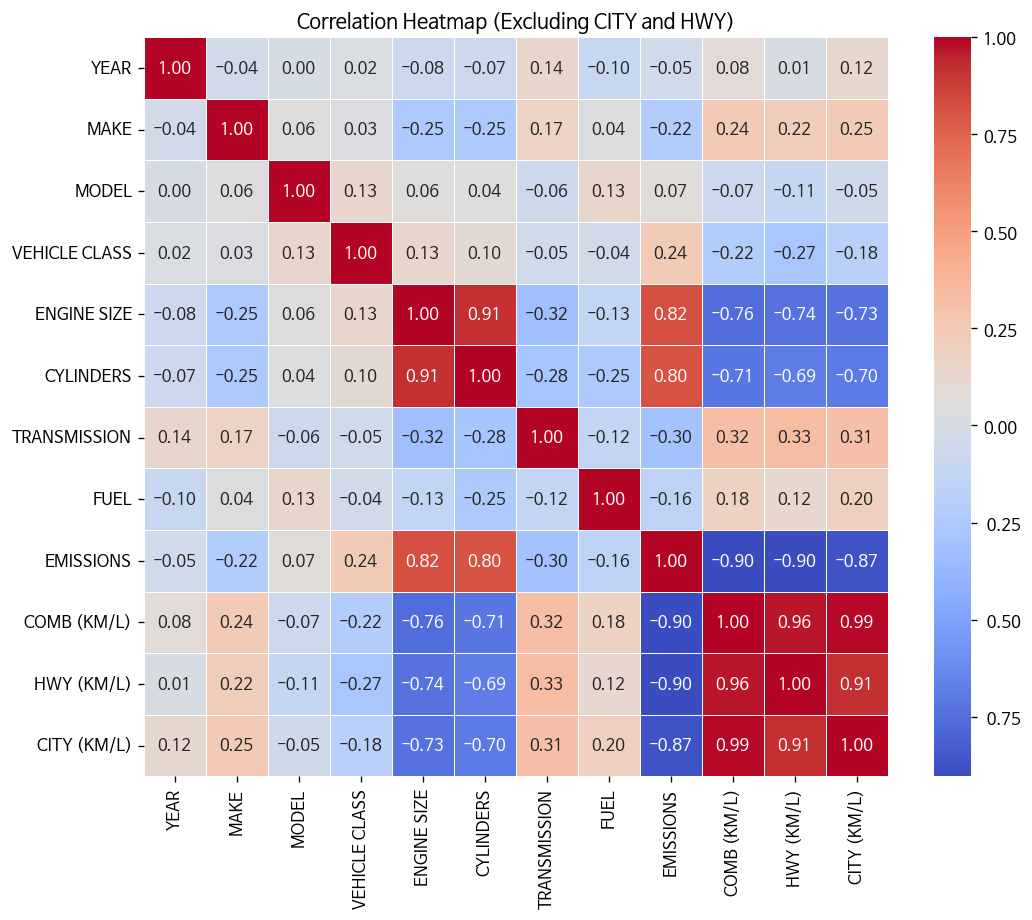

In [25]:
# CITY (KM/L)와 HWY (KM/L)를 제외한 상관계수 계산
correlation_matrix = df2.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Excluding CITY and HWY)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


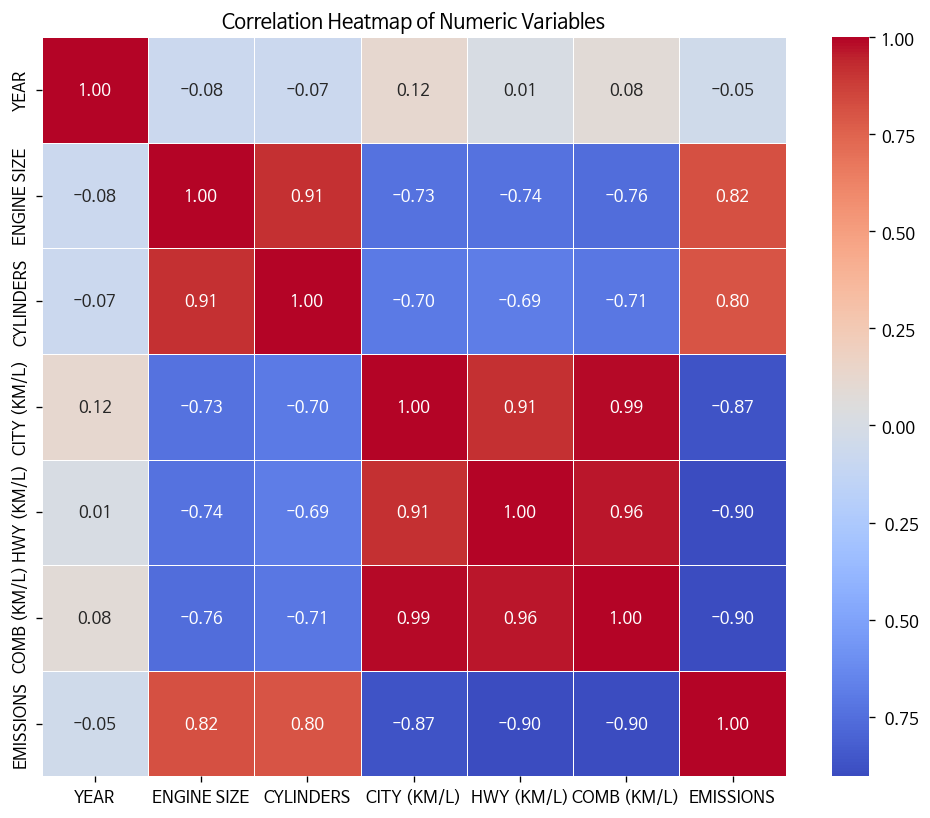

In [26]:
# 숫자형 변수들의 이름 리스트 생성
numeric_variables = ['YEAR', 'ENGINE SIZE', 'CYLINDERS', 'CITY (KM/L)',
                     'HWY (KM/L)', 'COMB (KM/L)',
                     'EMISSIONS']

# 숫자형 변수들만 추출하여 새로운 데이터프레임 생성
numeric_df = df[numeric_variables]

# 변수 간의 상관관계 계산
correlation_matrix = numeric_df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

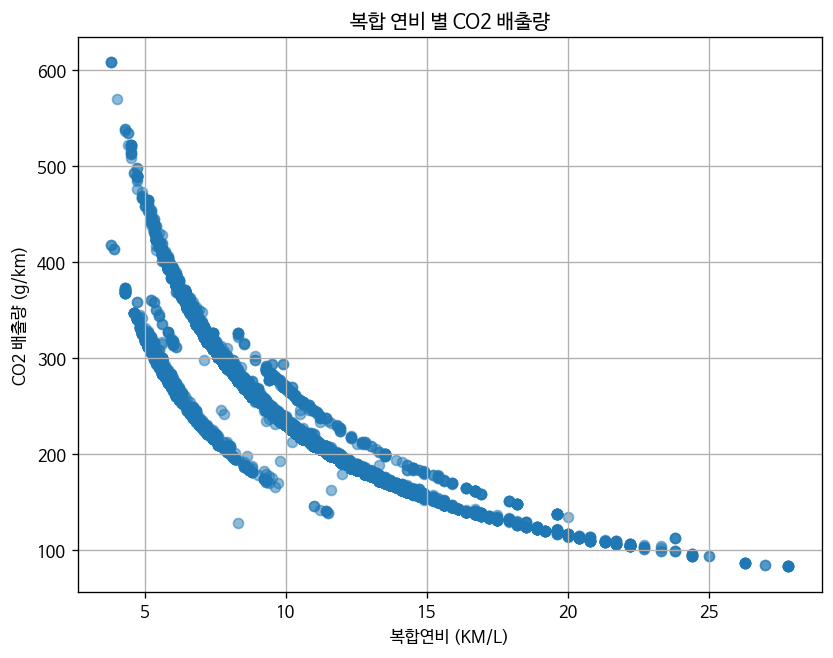

In [27]:
# COMB (KM/L)과 EMISSIONS 데이터 추출
comb = df['COMB (KM/L)']
emissions = df['EMISSIONS']

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(comb, emissions, alpha=0.5)
plt.title('복합 연비 별 CO2 배출량')
plt.xlabel('복합연비 (KM/L)')
plt.ylabel('CO2 배출량 (g/km)')
plt.grid(True)
plt.show()

연비와 CO2 배출량이 반비례하는 것을 볼 수 있다.
즉, 연비가 좋을 수록 CO2 배출량이 적고 친환경적이라고 생각할 수 있다.

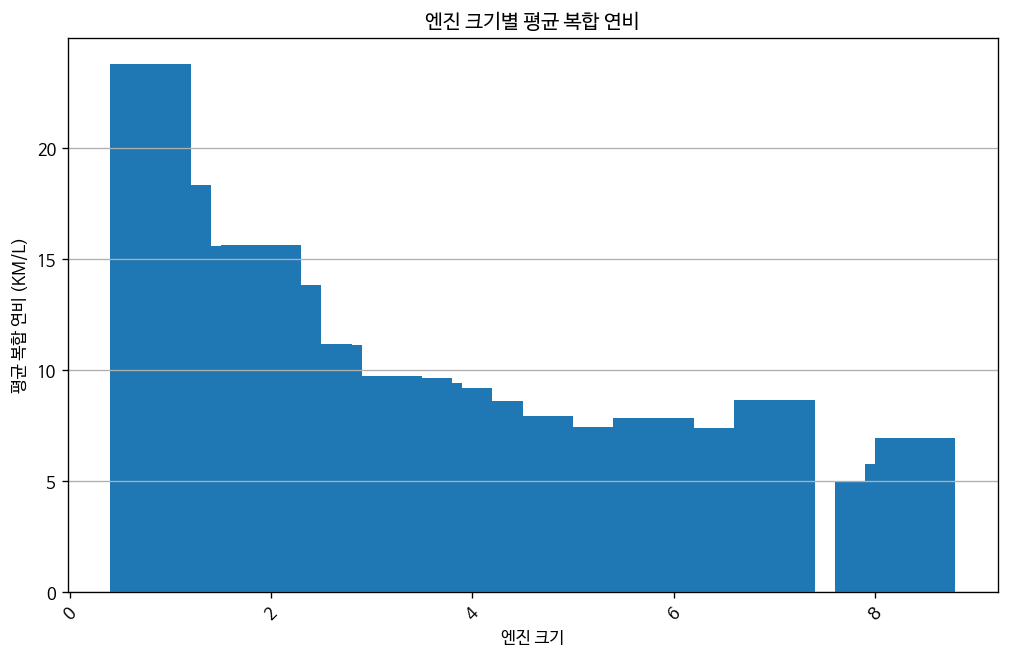

In [28]:
# 엔진 크기별 평균 복합 연비 계산
engine_size_avg_comb = df.groupby('ENGINE SIZE')['COMB (KM/L)'].mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(engine_size_avg_comb.index, engine_size_avg_comb.values)
plt.title('엔진 크기별 평균 복합 연비')
plt.xlabel('엔진 크기')
plt.ylabel('평균 복합 연비 (KM/L)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


또한 엔진 크기가 클수록 연비가 낮아지는 것을 볼 수 있다.

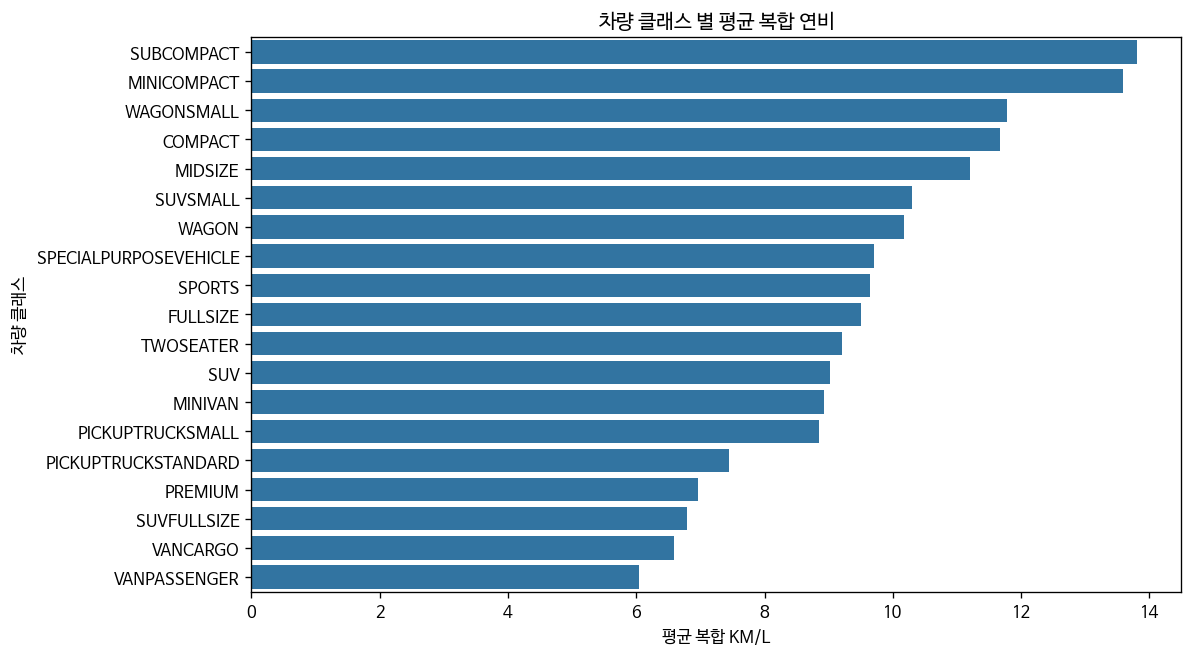

In [29]:
# 차량 클래스별 평균 연비 계산
avg_mpg_by_class = df.groupby('VEHICLE CLASS')['COMB (KM/L)'].mean().reset_index()

# 내림차순으로 정렬
avg_mpg_by_class = avg_mpg_by_class.sort_values(by='COMB (KM/L)', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='COMB (KM/L)', y='VEHICLE CLASS', data=avg_mpg_by_class, orient='h')
plt.title('차량 클래스 별 평균 복합 연비')
plt.xlabel('평균 복합 KM/L')
plt.ylabel('차량 클래스')
plt.show()


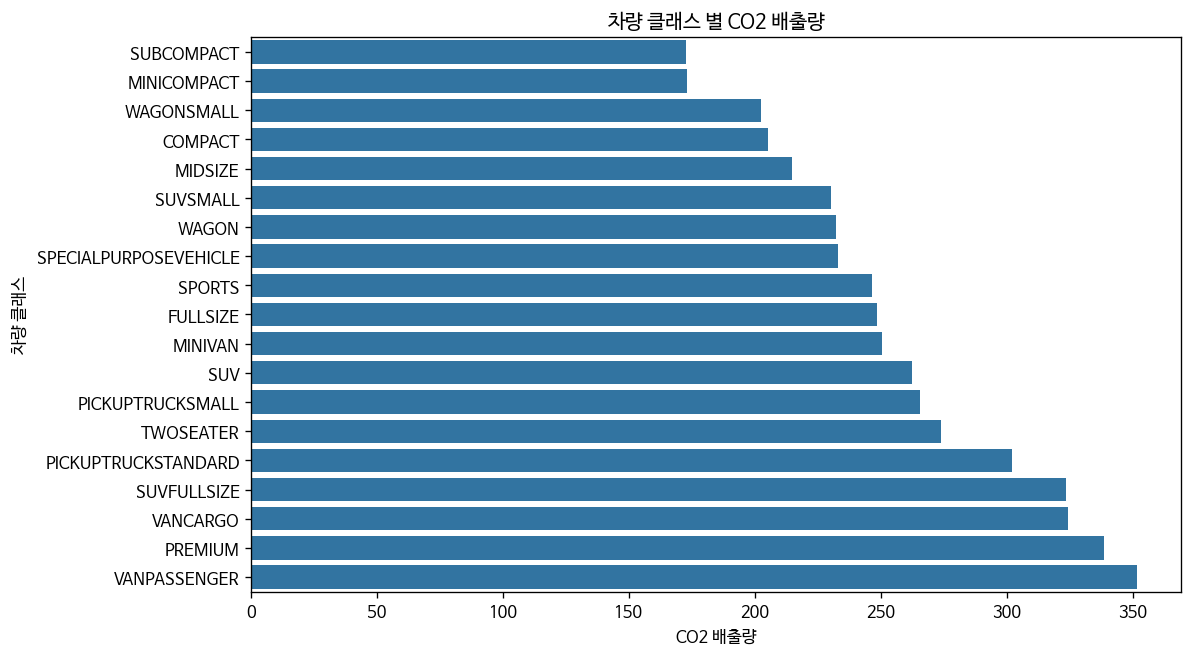

In [30]:
# 차량 클래스별 배출량 계산
avg_mpg_by_class = df.groupby('VEHICLE CLASS')['EMISSIONS'].mean().reset_index()

# 오름차순으로 정렬
avg_mpg_by_class = avg_mpg_by_class.sort_values(by='EMISSIONS', ascending=True)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='EMISSIONS', y='VEHICLE CLASS', data=avg_mpg_by_class, orient='h')
plt.title('차량 클래스 별 CO2 배출량')
plt.xlabel('CO2 배출량')
plt.ylabel('차량 클래스')
plt.show()


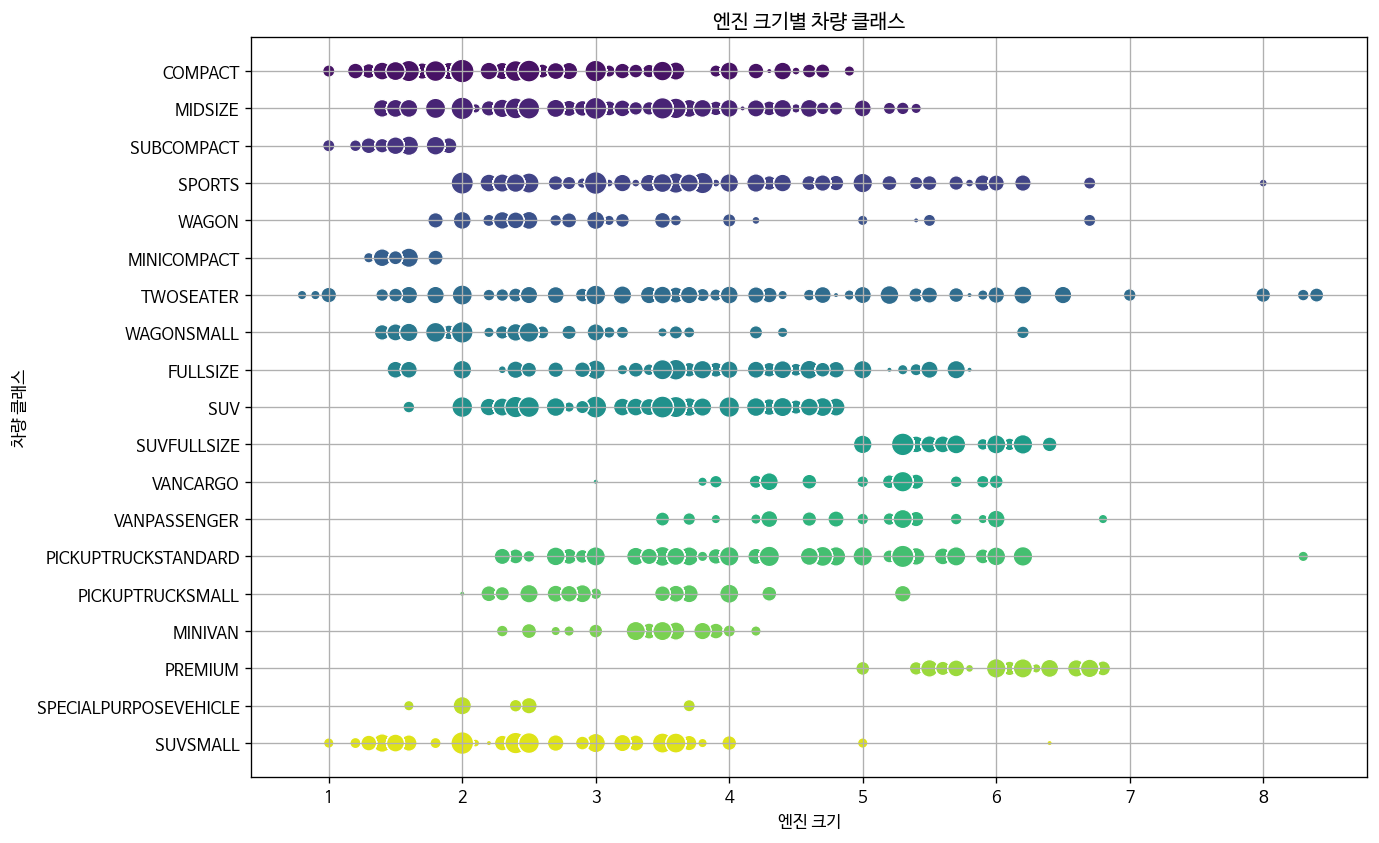

In [31]:
# 엔진 크기 별 차량 클래스
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='ENGINE SIZE', y='VEHICLE CLASS', hue='VEHICLE CLASS', palette='viridis', size=np.log1p(df.groupby(['ENGINE SIZE', 'VEHICLE CLASS']).transform('size')), sizes=(10, 200), legend=False)
plt.title('엔진 크기별 차량 클래스')
plt.xlabel('엔진 크기')
plt.ylabel('차량 클래스')
plt.grid(True)
plt.show()

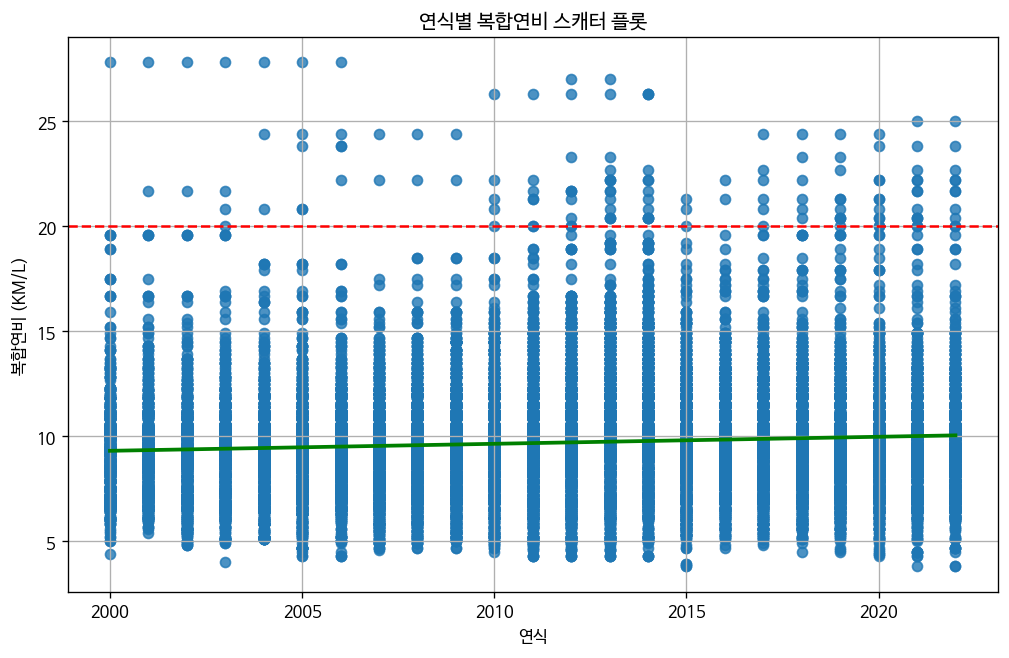

상관계수: 0.08059040849850262


In [32]:
# 산점도와 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.regplot(x='YEAR', y='COMB (KM/L)', data=df, line_kws={"color": "green"})
plt.axhline(y=20, color='r', linestyle='--')  # Y축 20에 선 추가
plt.title('연식별 복합연비 스캐터 플롯')
plt.xlabel('연식')
plt.ylabel('복합연비 (KM/L)')
plt.grid(True)
plt.show()

# 상관 계수 계산
correlation = df['YEAR'].corr(df['COMB (KM/L)'])
print("상관계수:", correlation)

In [33]:
# 복합 연비가 20 이상인 차량 필터링
high_efficiency_cars = df[df['COMB (KM/L)'] >= 20]

# 복합 연비가 20 이상인 차량의 총 수
total_high_efficiency_cars = high_efficiency_cars.shape[0]

# 모델명에 'HYBRID', 'PRIUS', 'INSIGHT', 'IONIQ', 'NIRO'가 포함된 차량의 수
hybrid_models_count = high_efficiency_cars[
    high_efficiency_cars['MODEL'].str.contains('HYBRID|PRIUS|INSIGHT|IONIQ|NIRO', case=False)].shape[0]

# 결과 출력
print("복합 연비가 20이 넘는 차들의 수:", total_high_efficiency_cars)
print("'HYBRID', 'PRIUS', 'INSIGHT', 'IONIQ', 'NIRO'를 포함하는 차들의 수:", hybrid_models_count)


복합 연비가 20이 넘는 차들의 수: 139
'HYBRID', 'PRIUS', 'INSIGHT', 'IONIQ', 'NIRO'를 포함하는 차들의 수: 128


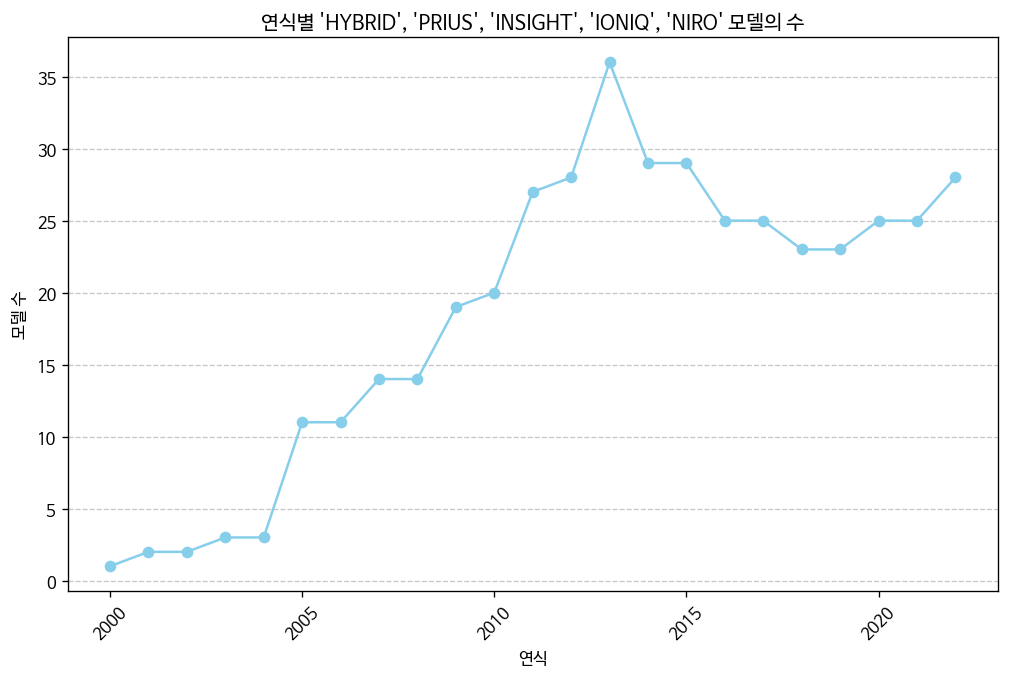

In [34]:
# 모델 이름에 'HYBRID', 'PRIUS', 'INSIGHT', 'IONIQ', 'NIRO'가 포함된 데이터 필터링
hybrid_models = df[df['MODEL'].str.contains('HYBRID|PRIUS|INSIGHT|IONIQ|NIRO', case=False)]

# 연식별로 모델 수 계산
models_by_year = hybrid_models.groupby('YEAR').size()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(models_by_year.index, models_by_year.values, marker='o', color='skyblue', linestyle='-')
plt.title("연식별 'HYBRID', 'PRIUS', 'INSIGHT', 'IONIQ', 'NIRO' 모델의 수")
plt.xlabel("연식")
plt.ylabel("모델 수")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

자동차 기술이 좋아지며 최근 제조된 자동차일수록 연비가 좋을 것이라 생각해 스캐터 플롯과 회귀선을 생성해봤다. 미미하지만 조금씩 오르는 것을 확인할 수 있다.
더 자세히 알아보기 위해 같은 모델의 연식별 연비를 시각화할 것이다.

2000년대 초반부터 복합연비가 눈에띄게 높은 차량이 있어서 찾아보니
혼다, 도요타의 하이브리드 차량이었다.

In [35]:
# 분석할 모델 선택
model_name = 'SONATA'


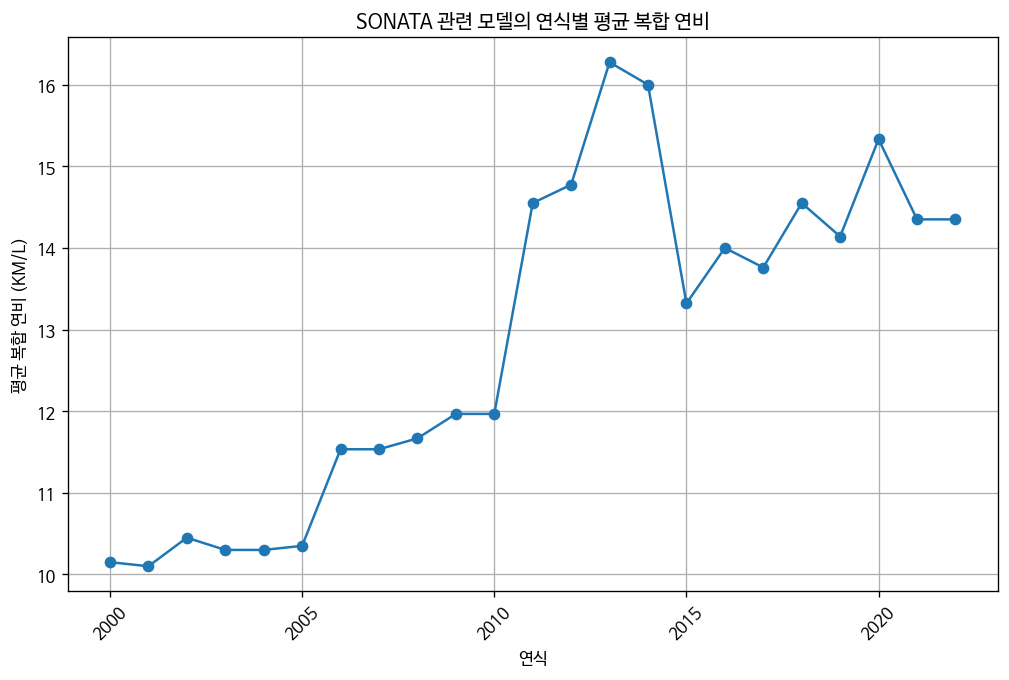

In [36]:
# 선택한 모델의 데이터 추출
model_data = df[df['MODEL'].str.contains(model_name)]

# 연식별 평균 복합 연비 계산
yearly_avg_comb_all = model_data.groupby('YEAR')['COMB (KM/L)'].mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_comb_all.index, yearly_avg_comb_all.values, marker='o')
plt.title(f'{model_name} 관련 모델의 연식별 평균 복합 연비')
plt.xlabel('연식')
plt.ylabel('평균 복합 연비 (KM/L)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


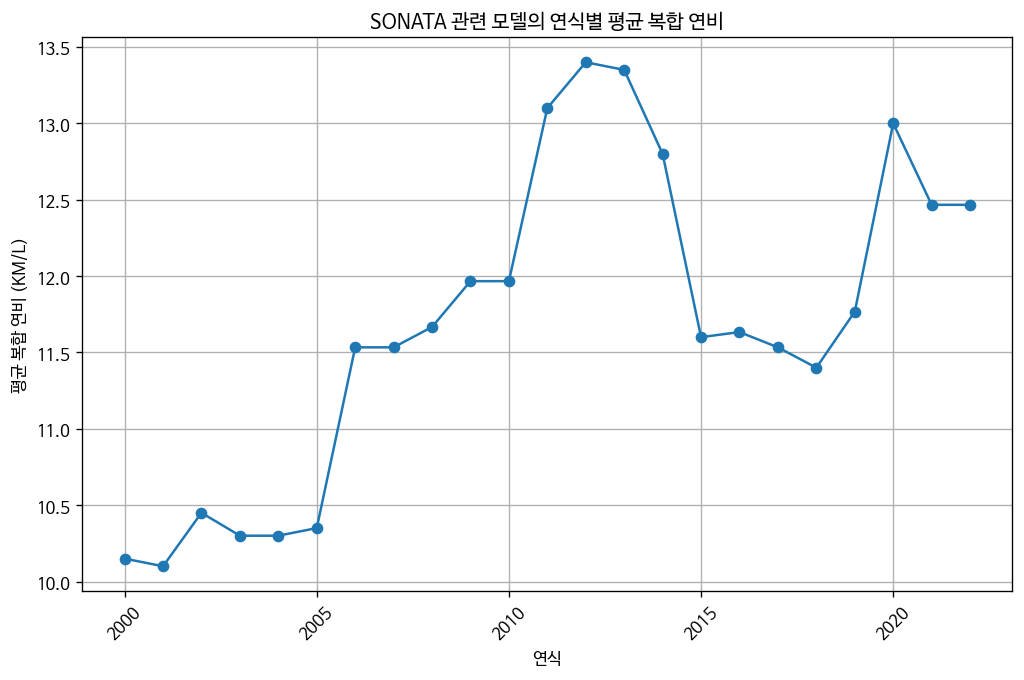

In [37]:
# 선택한 모델의 데이터 추출 (HYBRID 제외)
model_data = df[df['MODEL'].str.contains(model_name) & ~df['MODEL'].str.contains('HYBRID')]

# 연식별 평균 복합 연비 계산
yearly_avg_comb_non_hybrid = model_data.groupby('YEAR')['COMB (KM/L)'].mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_comb_non_hybrid.index, yearly_avg_comb_non_hybrid.values, marker='o')
plt.title(f'{model_name} 관련 모델의 연식별 평균 복합 연비')
plt.xlabel('연식')
plt.ylabel('평균 복합 연비 (KM/L)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


하이브리드 모델이 있는 차량의 연식별 연비를 시각화했다.
우선 모든 소나타 모델 그래프와 하이브리드를 제외한 그래프를 나누어 시각화했다.
그래프가 나눠져있기 때문에 한 그래프 안에 시각화할 것이다.

In [38]:
# 하이브리드를 포함한 모델에 대한 데이터 추출
hybrid_model_data = df[df['MODEL'].str.contains('HYBRID') & df['MODEL'].str.contains(model_name)]

# 하이브리드를 포함한 모델의 연식별 평균 복합 연비 계산
yearly_avg_comb_hybrid = hybrid_model_data.groupby('YEAR')['COMB (KM/L)'].mean()

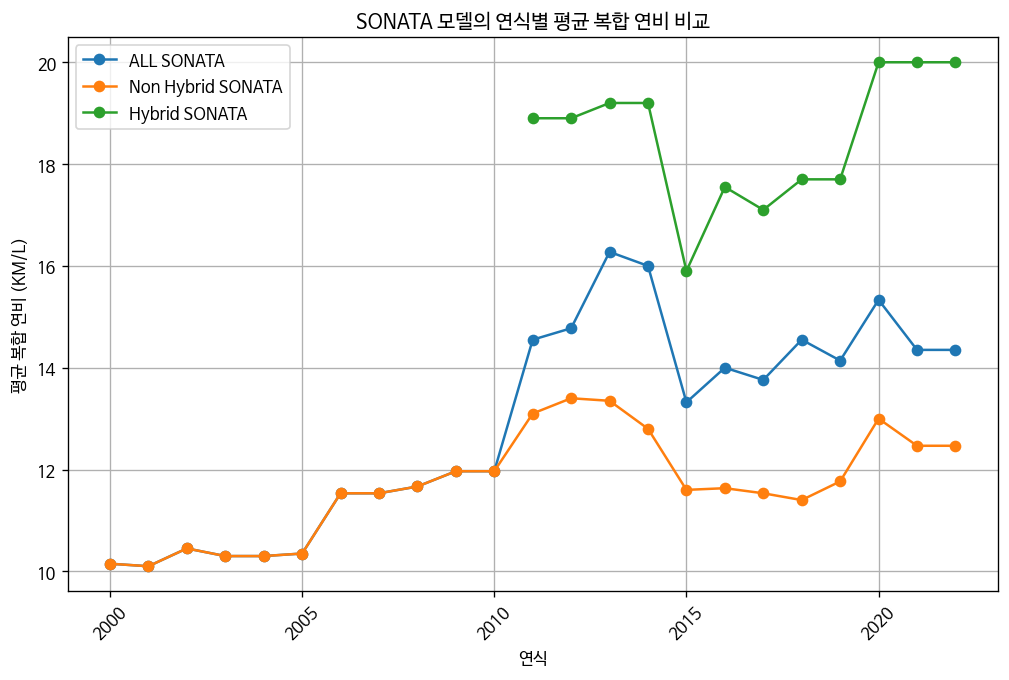

In [39]:
# 시각화
plt.figure(figsize=(10, 6))

# 모든 모델에 대한 연식별 평균 복합 연비
plt.plot(yearly_avg_comb_all.index, yearly_avg_comb_all.values, marker='o', label=f'ALL {model_name}')

# HYBRID를 제외한 모델에 대한 연식별 평균 복합 연비
plt.plot(yearly_avg_comb_non_hybrid.index, yearly_avg_comb_non_hybrid.values, marker='o', label=f'Non Hybrid {model_name}')

# 하이브리드를 포함한 모델에 대한 연식별 평균 복합 연비
plt.plot(yearly_avg_comb_hybrid.index, yearly_avg_comb_hybrid.values, marker='o', label=f'Hybrid {model_name}')

plt.title(f'{model_name} 모델의 연식별 평균 복합 연비 비교')
plt.xlabel('연식')
plt.ylabel('평균 복합 연비 (KM/L)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()


2011년부터 소나타의 하이브리드 버전이 출시된 것을 알 수 있다.
하이브리드 버전을 포함시킨 그래프가 훨씬 연비가 잘 나오는 것을 볼 수 있다.

기술의 발전으로 연비가 상승폭을 가지다가 2015년에 급 하락한 것을 볼 수 있다.
1. 정부 인증 절차를 통해 연비의 측정값이 하향 조정.
2. 2015년식 쏘나타부터 안정성 및 차량 강성 향상과 스마트 센서들이 추가되며 차체 중량이 증가되어 연비가 낮아진 것.


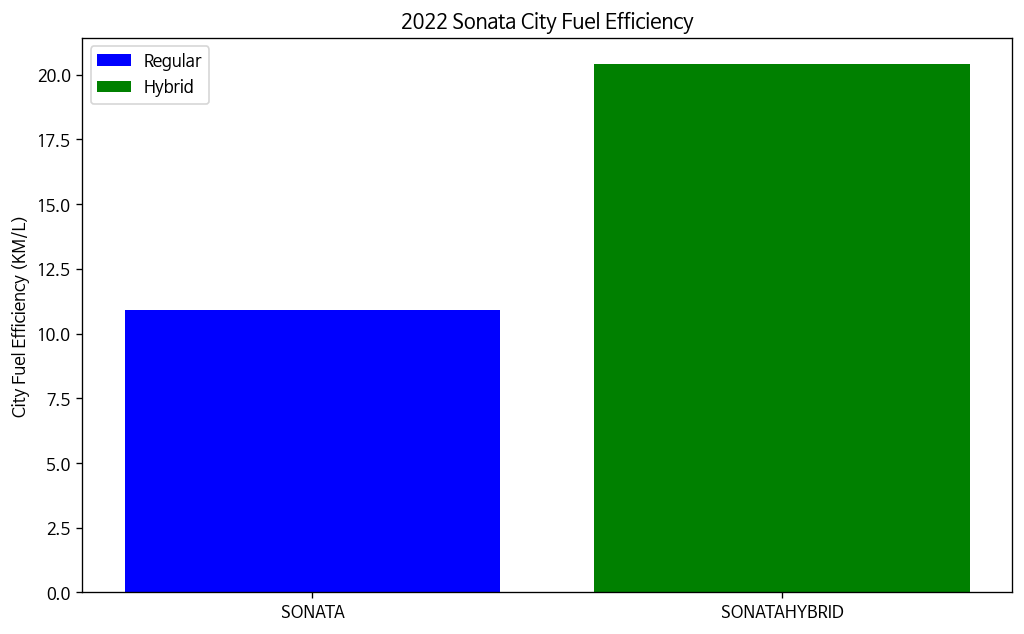

In [40]:
# 모델명에 'HYBRID'가 포함되어 있는지 여부에 따라 데이터 분리
regular_model = df[~df['MODEL'].str.contains('HYBRID')]
hybrid_model = df[df['MODEL'].str.contains('HYBRID')]

# 시각화
plt.figure(figsize=(10, 6))

# 일반 모델 시각화
plt.bar('SONATA', regular_model['CITY (KM/L)'].values[0], color='blue', label='Regular')
# 하이브리드 모델 시각화
plt.bar('SONATAHYBRID', hybrid_model['CITY (KM/L)'].values[0], color='green', label='Hybrid')

plt.title('2022 Sonata City Fuel Efficiency')
plt.ylabel('City Fuel Efficiency (KM/L)')
plt.legend()
plt.show()

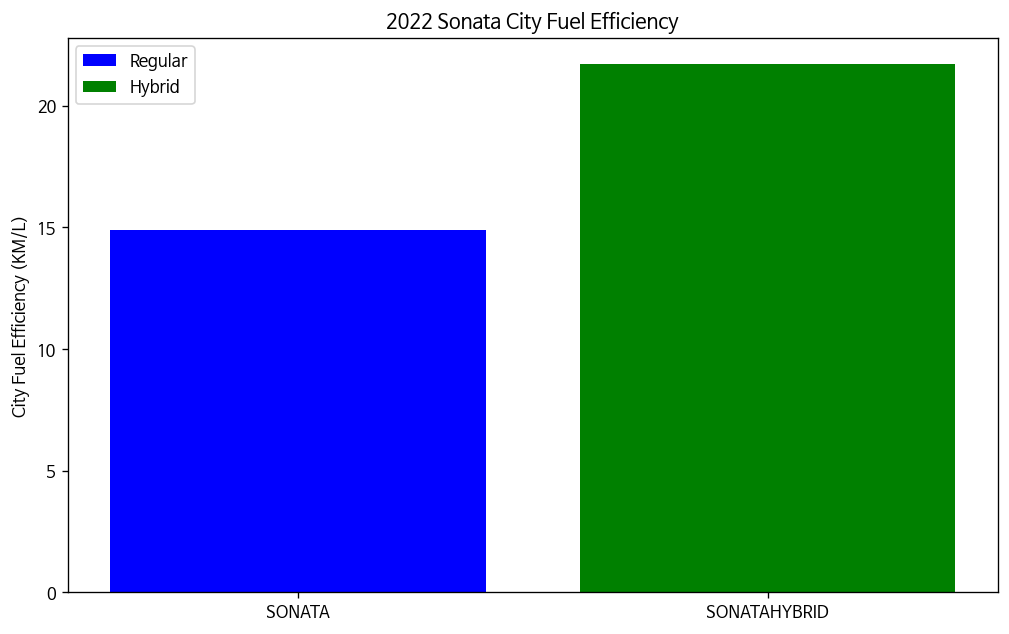

In [41]:
# 모델명에 'HYBRID'가 포함되어 있는지 여부에 따라 데이터 분리
regular_model = df[~df['MODEL'].str.contains('HYBRID')]
hybrid_model = df[df['MODEL'].str.contains('HYBRID')]

# 시각화
plt.figure(figsize=(10, 6))

# 일반 모델 시각화
plt.bar('SONATA', regular_model['HWY (KM/L)'].values[0], color='blue', label='Regular')
# 하이브리드 모델 시각화
plt.bar('SONATAHYBRID', hybrid_model['HWY (KM/L)'].values[0], color='green', label='Hybrid')

plt.title('2022 Sonata City Fuel Efficiency')
plt.ylabel('City Fuel Efficiency (KM/L)')
plt.legend()
plt.show()

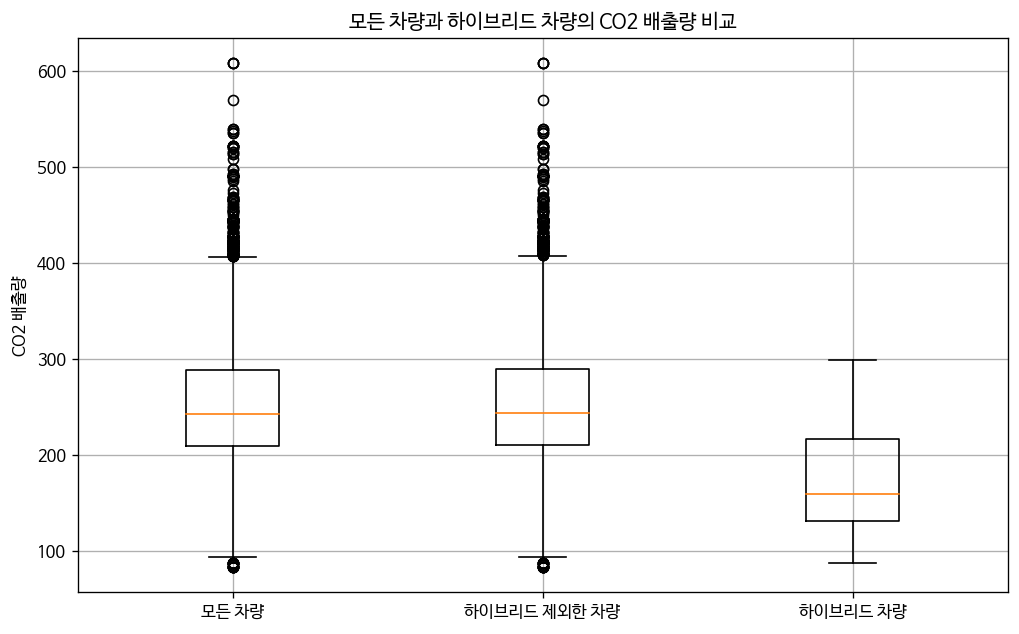

In [42]:
# 모든 차량에 대한 CO2 배출량
all_co2_emissions = df['EMISSIONS']

# 'HYBRID'를 포함하는 데이터 필터링
hybrid_data = df[df['MODEL'].str.contains('HYBRID')]

# 하이브리드를 포함하지 않는 모든 차량에 대한 CO2 배출량
non_hybrid_data = df[~df['MODEL'].str.contains('HYBRID')]
non_hybrid_co2_emissions = non_hybrid_data['EMISSIONS']

# 필터링된 데이터의 CO2 배출량
hybrid_co2_emissions = hybrid_data['EMISSIONS']

# 시각화
plt.figure(figsize=(10, 6))

# 박스 플롯 그리기
plt.boxplot([all_co2_emissions, non_hybrid_co2_emissions, hybrid_co2_emissions],
            labels=['모든 차량', '하이브리드 제외한 차량', '하이브리드 차량'])

plt.title('모든 차량과 하이브리드 차량의 CO2 배출량 비교')
plt.ylabel('CO2 배출량')
plt.grid(True)
plt.show()

하이브리드 차량이 연비가 좋은 만큼 CO2 배출량이 적은 것을 볼 수 있다.

<ipython-input-43-e08a44dc05a9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fuel_emissions_mean, x='FUEL', y='EMISSIONS', palette='viridis')


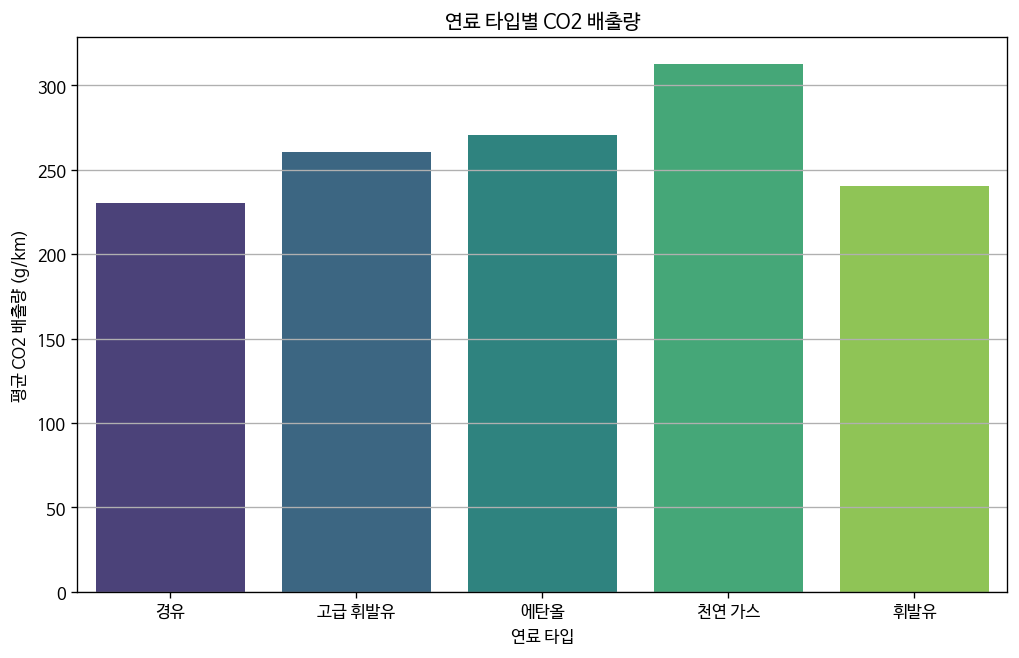

In [43]:
# 연료 유형별 배출량의 평균 계산
fuel_emissions_mean = df.groupby('FUEL')['EMISSIONS'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=fuel_emissions_mean, x='FUEL', y='EMISSIONS', palette='viridis')
plt.title('연료 타입별 CO2 배출량')
plt.xlabel('연료 타입')
plt.ylabel('평균 CO2 배출량 (g/km)')
plt.grid(axis='y')
plt.show()

CO2 배출량이 낮다고 예측한 순서

1. 천연 가스: 천연 가스는 상대적으로 깨끗한 연료로 알려져 있습니다. 이는 화석 연료보다 더 적은 CO2를 생성하는 경향이 있습니다.

2. 에탄올: 에탄올은 생산 과정에서 식물 잔재를 사용하므로 이산화탄소를 덜 발생시킬 수 있습니다.

3. 경유: 경유는 휘발유보다 약간 더 많은 CO2를 생성하는 경향이 있습니다. 그러나 현대의 경유 차량은 휘발유 차량보다 연비가 더 좋을 수 있어서 실제로는 상황에 따라 다를 수 있습니다.

4. 휘발유: 휘발유는 경유보다 더 많은 CO2를 생성하는 경향이 있습니다.

5. 고급 휘발유: 고급 휘발유는 일반적으로 휘발유보다 더 많은 CO2를 생성합니다.

그래프를 보면 오히려 천연가스와 에탄올을 사용하는 차량이 더 많은 배출량을 보인다.

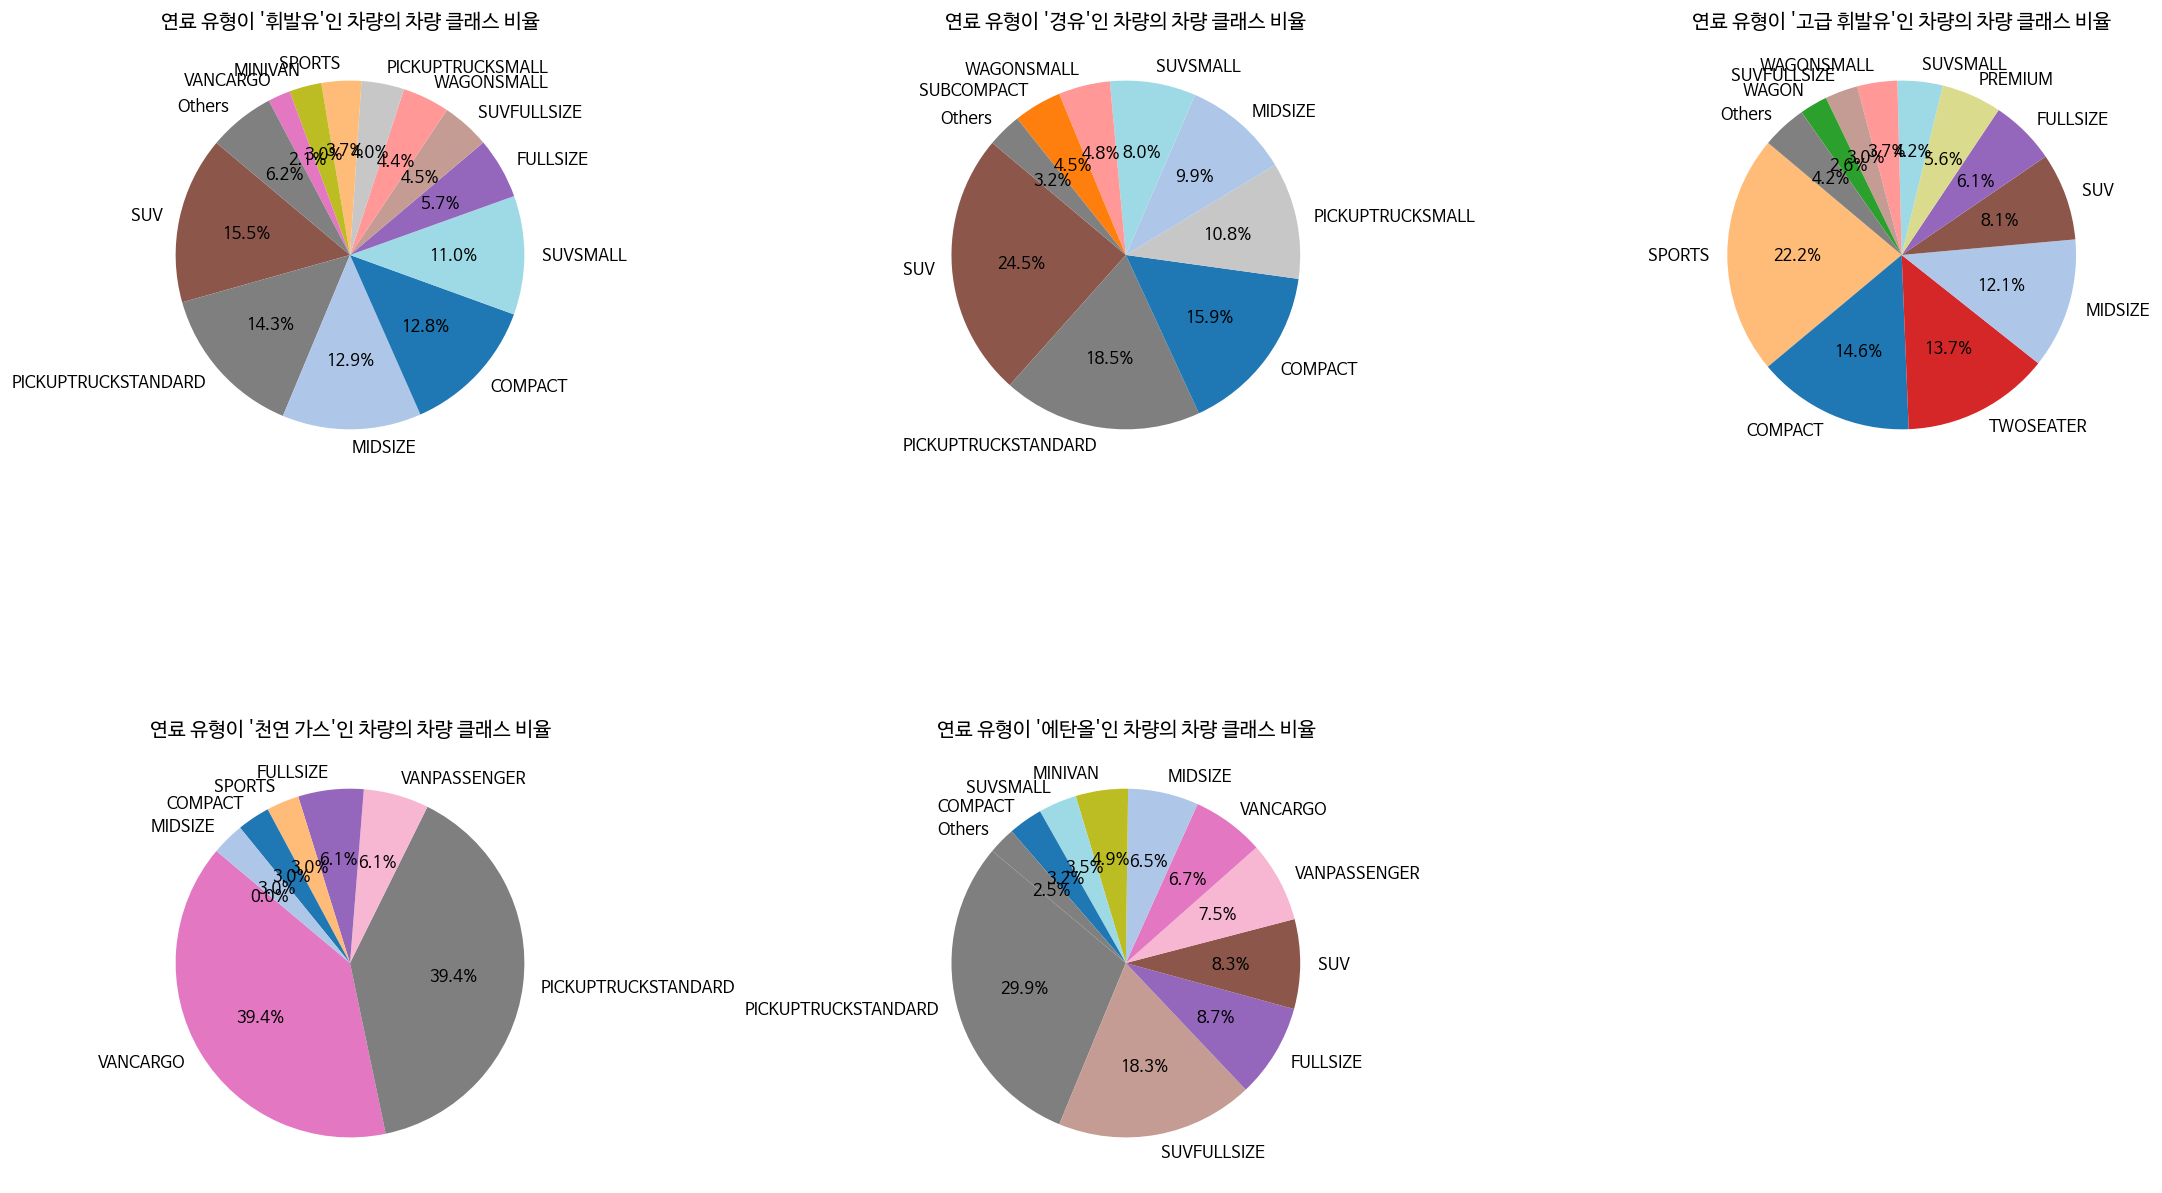

In [44]:
# 각 연료 유형에 대한 데이터프레임 리스트 생성
fuel_types = ['휘발유', '경유', '고급 휘발유', '천연 가스', '에탄올']
fuel_data = [df[df['FUEL'] == fuel_type] for fuel_type in fuel_types]

# 차량 클래스에 고유한 색상 할당
class_colors = {}
classes = df['VEHICLE CLASS'].unique()
num_classes = len(classes)
colors = plt.cm.tab20(np.linspace(0, 1, num_classes))
for i, cls in enumerate(classes):
    class_colors[cls] = colors[i % num_classes]

# 차량 클래스 비율 계산 및 시각화
plt.figure(figsize=(18, 12))

for i, (fuel_type, data) in enumerate(zip(fuel_types, fuel_data), 1):
    class_counts = data['VEHICLE CLASS'].value_counts()
    class_ratios = class_counts / class_counts.sum()

    # 비율이 2% 미만인 차량 클래스 필터링
    class_ratios_filtered = class_ratios[class_ratios >= 0.02]
    class_ratios_filtered['Others'] = class_ratios[class_ratios < 0.02].sum()  # 3% 미만인 항목들을 하나의 항목으로 합침

    # 파이 차트 그리기
    plt.subplot(2, 3, i)
    class_ratios_filtered.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=[class_colors.get(cls, 'grey') for cls in class_ratios_filtered.index])
    plt.title(f"연료 유형이 '{fuel_type}'인 차량의 차량 클래스 비율")
    plt.ylabel('')

plt.tight_layout()
plt.show()

천연 가스를 사용하는 차량 클래스는 픽업트럭, 화물 운송 밴이 약 80%를 차지하고 있기 때문에 CO2 배출량이 높은 것이라 생각할 수 있다.

<ipython-input-45-224f1ea586b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='FUEL', y='EMISSIONS', palette='Set2', jitter=True)


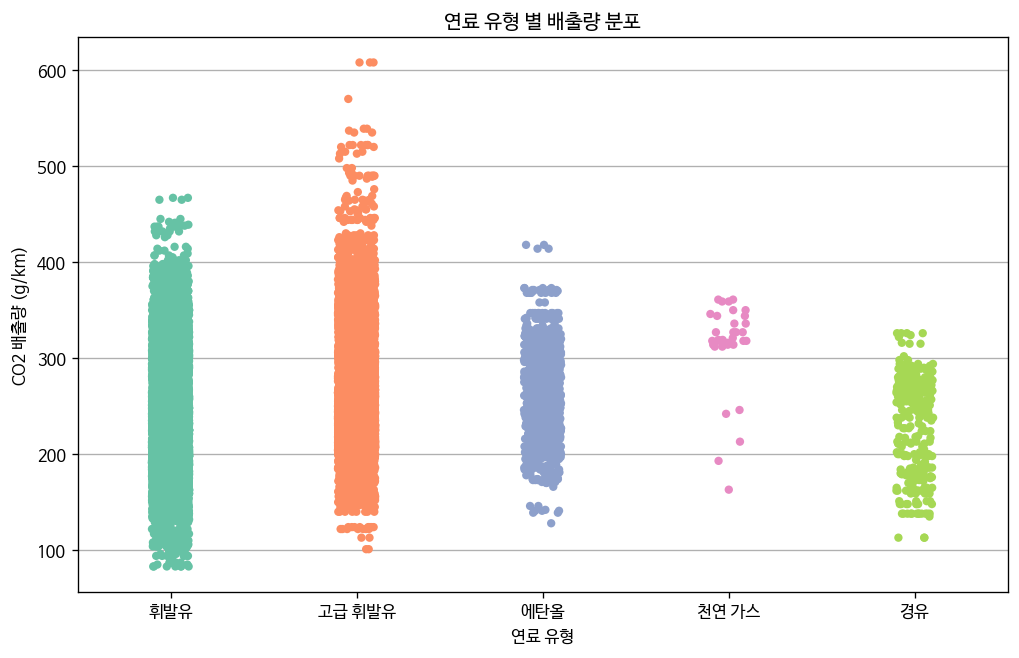

In [45]:
# 연료 유형별로 배출량의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='FUEL', y='EMISSIONS', palette='Set2', jitter=True)
plt.title('연료 유형 별 배출량 분포')
plt.xlabel('연료 유형')
plt.ylabel('CO2 배출량 (g/km)')
plt.grid(axis='y')
plt.show()


<ipython-input-46-6bafb091dbaa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='FUEL', y='EMISSIONS', palette='Set2')


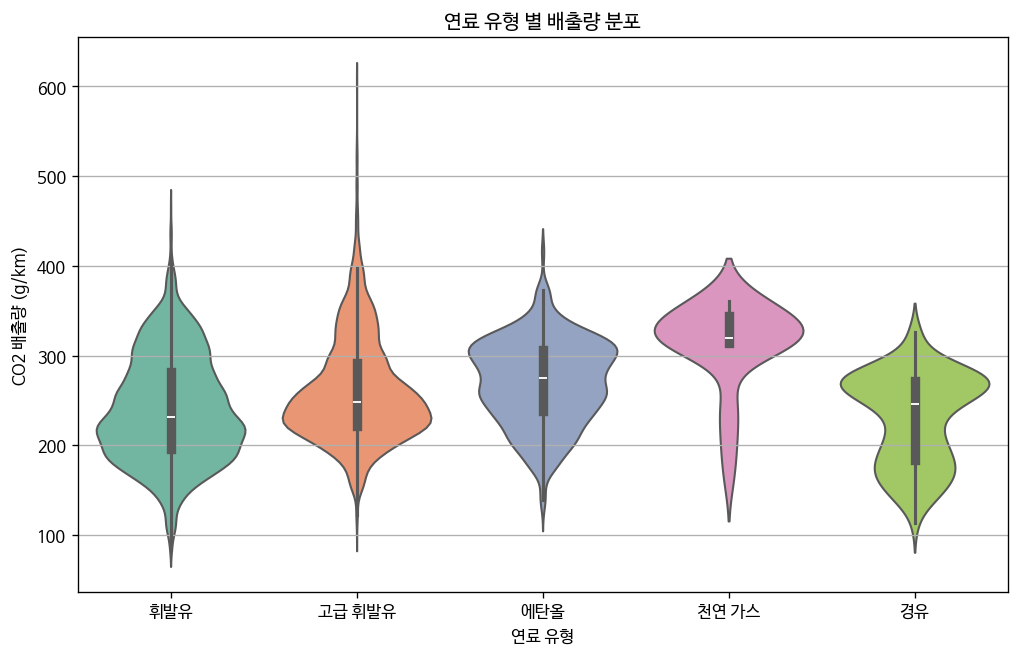

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='FUEL', y='EMISSIONS', palette='Set2')
plt.title('연료 유형 별 배출량 분포')
plt.xlabel('연료 유형')
plt.ylabel('CO2 배출량 (g/km)')
plt.grid(axis='y')
plt.show()


<ipython-input-47-9b8d5034e8a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emissions_by_make, x='MAKE', y='EMISSIONS', palette='Set2')


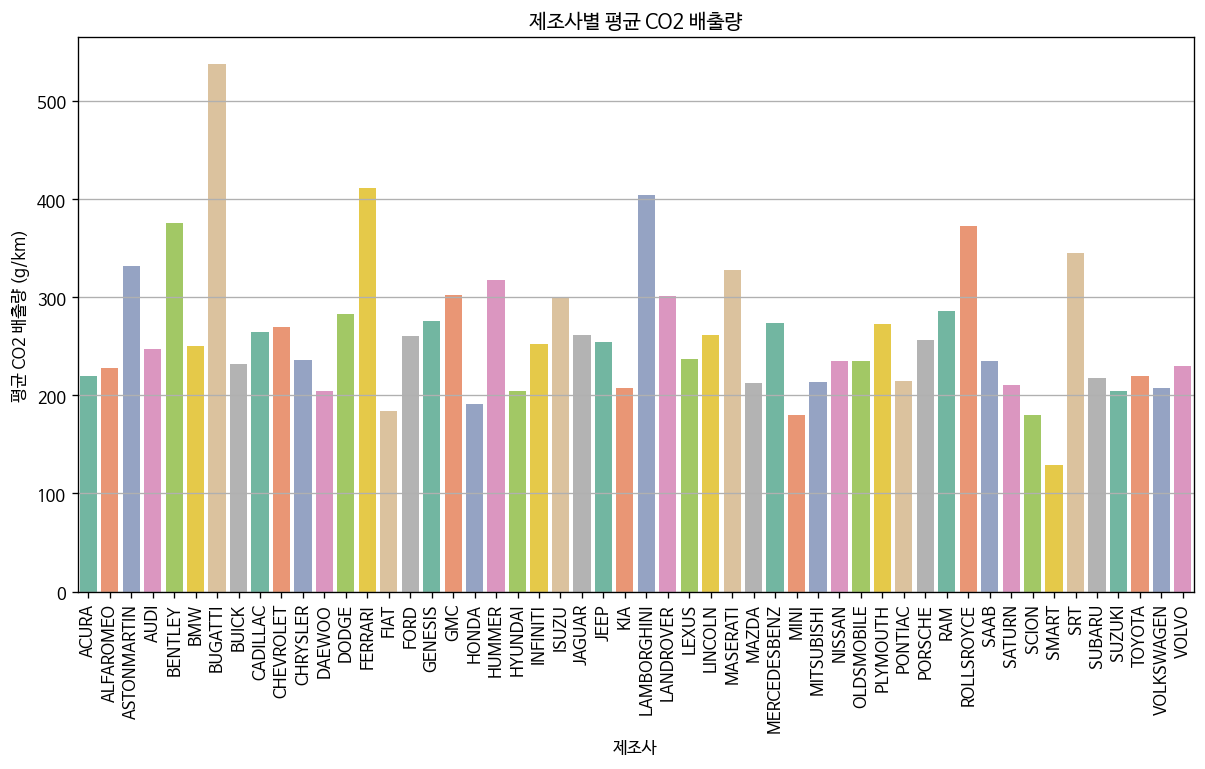

In [47]:
# 제조사별 배출량의 평균 계산
emissions_by_make = df.groupby('MAKE')['EMISSIONS'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=emissions_by_make, x='MAKE', y='EMISSIONS', palette='Set2')
plt.title('제조사별 평균 CO2 배출량')
plt.xlabel('제조사')
plt.ylabel('평균 CO2 배출량 (g/km)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

제조사 별 CO2 배출량을 시각화했다.
제조사 데이터가 너무 많아서 한눈에 보기 어렵다.

In [48]:
plt.rcParams['figure.dpi'] = 150

In [49]:
# 트리맵 차트 생성
fig = px.treemap(df,
                 path=['MAKE'],
                 values='EMISSIONS',
                 color='EMISSIONS',
                 color_continuous_scale='Reds',  # 사용할 색상 척도 지정
                 title='제조사별 배출량 트리맵 차트')

fig.update_layout(width=1800, height=1000)

# 차트 출력
fig.show()


In [50]:
# 제조사별 빈도, 총 배출량, 평균 배출량 계산
make_stats = df.groupby('MAKE').agg({'EMISSIONS': ['count', 'sum', 'mean']}).reset_index()
make_stats.columns = ['MAKE', 'COUNT', 'TOTAL_EMISSIONS', 'AVG_EMISSIONS']
make_stats['PERCENTAGE'] = make_stats['COUNT'] / make_stats['COUNT'].sum() * 100

# 트리맵 차트 생성
fig = px.treemap(make_stats,
                 path=['MAKE'],  # 트리맵의 계층적 구조를 지정합니다.
                 values='PERCENTAGE',  # 각 영역의 크기를 빈도 점유율로 정합니다.
                 color='AVG_EMISSIONS',  # 영역의 색상을 평균 배출량으로 정합니다.
                 color_continuous_scale='Reds',  # 색상 스케일을 설정합니다.
                 title='제조사별 평균 배출량과 빈도 점유율 트리맵 차트',  # 차트 제목을 지정합니다.
                 labels={'PERCENTAGE': '빈도 점유율', 'AVG_EMISSIONS': '평균 배출량'},  # 축 레이블을 설정합니다.
                 custom_data=['AVG_EMISSIONS', 'PERCENTAGE'])  # 커스텀 데이터를 지정합니다.

# 차트 크기 조정
fig.update_layout(width=1800, height=1000)

# 툴팁 서식 설정
fig.update_traces(texttemplate='%{label}<br>평균 배출량: %{customdata[0]:.2f}<br>빈도 점유율: %{customdata[1]:.2f}%',
                  hoverinfo='text+value')

# 차트 출력
fig.show()


제조사 별로 크기를 통해 데이터 점유율을 나타내고, 색이 진할 수록 CO2 배출량이 높다는 것을 트리맵 차트로 표현했다.

In [51]:
plt.rcParams['figure.dpi'] = 120

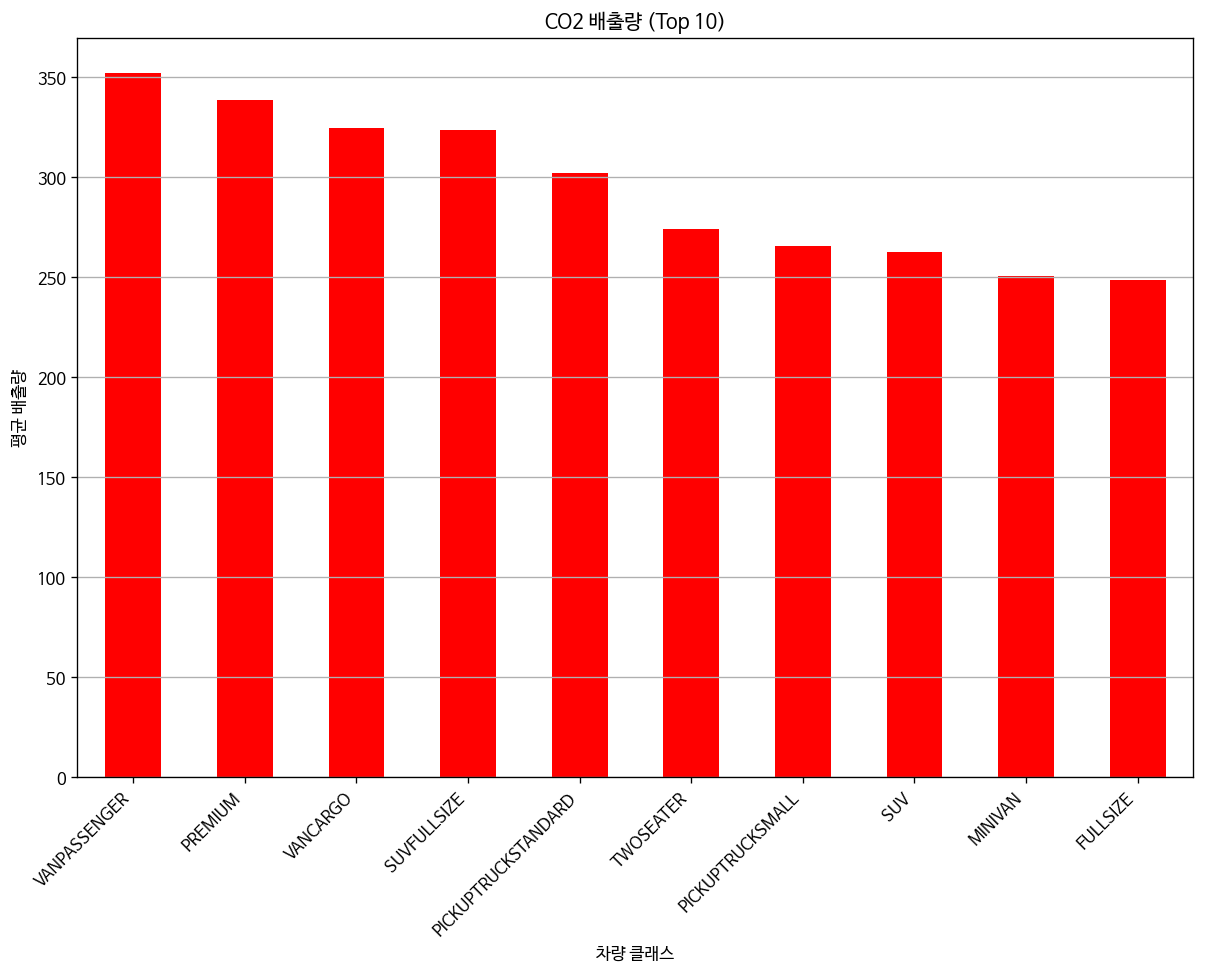

In [52]:
emission_means = df.groupby('VEHICLE CLASS')['EMISSIONS'].mean()

# 상위 10개의 데이터만 선택
top_10_emissions = emission_means.nlargest(10)

# 그래프 그리기
plt.figure(figsize=(12, 8))
top_10_emissions.plot(kind='bar', color='red')
plt.title('CO2 배출량 (Top 10)')
plt.xlabel('차량 클래스')
plt.ylabel('평균 배출량')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [53]:
# 차량 클래스별 평균 배출량과 점유율 계산
class_stats = df.groupby('VEHICLE CLASS').agg({'EMISSIONS': 'mean', 'MAKE': 'count'}).reset_index()
class_stats.columns = ['VEHICLE CLASS', 'AVG EMISSIONS', 'COUNT']

# 총 차량 개수 계산
total_count = class_stats['COUNT'].sum()

# 점유율 계산
class_stats['PERCENTAGE'] = class_stats['COUNT'] / total_count * 100

# 트리맵 차트 생성
fig = px.treemap(class_stats,
                 path=['VEHICLE CLASS'],
                 values='PERCENTAGE',  # 점유율을 표시
                 color='AVG EMISSIONS',
                 color_continuous_scale='Reds',
                 title='차량 클래스별 평균 배출량과 점유율 트리맵 차트',
                 labels={'AVG EMISSIONS': '평균 배출량', 'PERCENTAGE': '점유율(%)'},
                 custom_data=['AVG EMISSIONS', 'COUNT'])

# 차트 크기 조정
fig.update_layout(width=1600, height=1000)

# 툴팁 서식 설정
fig.update_traces(texttemplate='%{label}<br>%{customdata[0]:.2f} (평균 배출량)<br>%{value:.2f}% (점유율)',
                  hoverinfo='text+value')

# 차트 출력
fig.show()


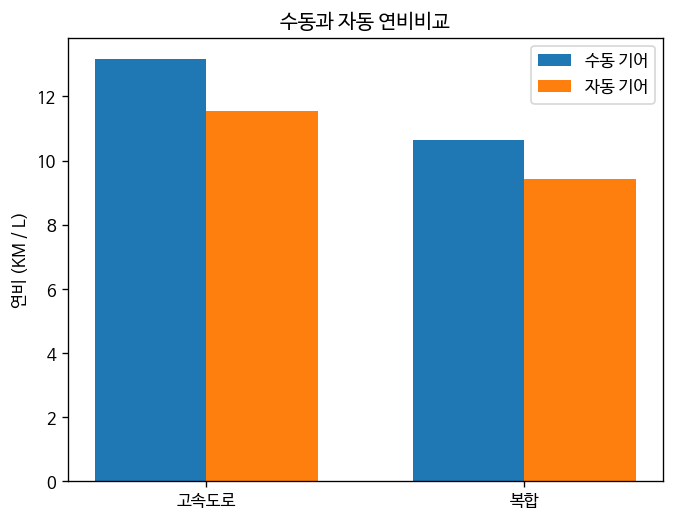

In [54]:
# 수동 자동 분류
manual_trans = df[df['TRANSMISSION'].isin(['M5', 'M6', 'M7'])]
auto_trans = df[df['TRANSMISSION'].isin(['A4','AS6','A6','AS8','A5','AS5','AV','A8','AM7','AS7','A9','AS10','A7','AS4','AM6','AM8','A10','AV7','AV6','AS9'])]

df

# 수동 기어와 자동 기어의 평균 고속도로 연비 및 평균 연비 계산
manual_hw_avg = manual_trans['HWY (KM/L)'].mean()
manual_comb_avg = manual_trans['COMB (KM/L)'].mean()
auto_hw_avg = auto_trans['HWY (KM/L)'].mean()
auto_comb_avg = auto_trans['COMB (KM/L)'].mean()

# 그래프 생성
labels = ['고속도로', '복합']
manual_means = [manual_hw_avg, manual_comb_avg]
auto_means = [auto_hw_avg, auto_comb_avg]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, manual_means, width, label='수동 기어')
rects2 = ax.bar([p + width for p in x], auto_means, width, label='자동 기어')

ax.set_ylabel('연비 (KM / L)')
ax.set_title('수동과 자동 연비비교')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()

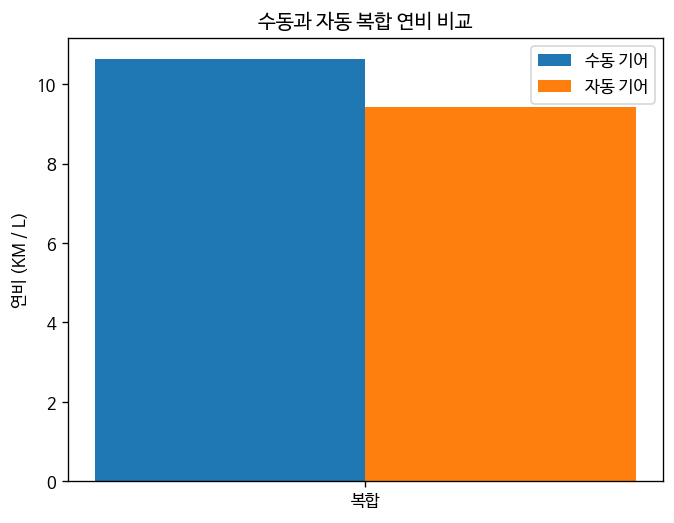

In [55]:

# 그래프 생성
labels = ['복합']
manual_means = [manual_comb_avg]
auto_means = [auto_comb_avg]

x = range(len(labels))
width = 0.2  # 막대의 너비를 줄임

fig, ax = plt.subplots()
rects1 = ax.bar(x, manual_means, width, label='수동 기어')
rects2 = ax.bar([p + width for p in x], auto_means, width, label='자동 기어')

ax.set_ylabel('연비 (KM / L)')
ax.set_title('수동과 자동 복합 연비 비교')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


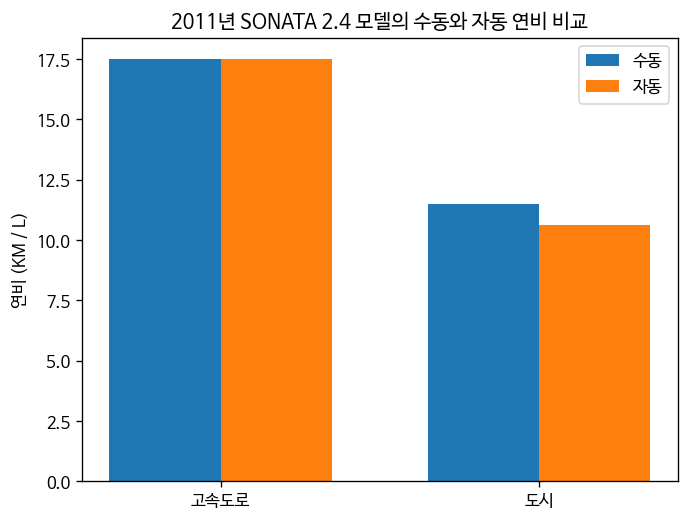

In [56]:
# 엔진이 2.4이고 변속기가 M6인 경우 추출
sonata_m = df[(df['YEAR'] == 2011) & (df['MODEL'] == 'SONATA') & (df['ENGINE SIZE'] == 2.4) & (df['TRANSMISSION'] == 'M6')]

# 엔진이 2.4이고 변속기가 AS6인 경우 추출
sonata_a = df[(df['YEAR'] == 2011) & (df['MODEL'] == 'SONATA') & (df['ENGINE SIZE'] == 2.4) & (df['TRANSMISSION'] == 'AS6')]

# 그래프 생성
labels = ['고속도로', '도시']
m_means = [sonata_m['HWY (KM/L)'].mean(), sonata_m['CITY (KM/L)'].mean()]
a_means = [sonata_a['HWY (KM/L)'].mean(), sonata_a['CITY (KM/L)'].mean()]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, m_means, width, label='수동')
rects2 = ax.bar([p + width for p in x], a_means, width, label='자동')

ax.set_ylabel('연비 (KM / L)')
ax.set_title('2011년 SONATA 2.4 모델의 수동와 자동 연비 비교')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


인사이트 도출
1. 연료 시세와 연비를 비교하여 경제적인 차를 고르는 법
2. 자동차 판매 마케팅 전략. 시장 세그먼테이션 및 고객 선호도 파악: 다양한 차량 클래스나 제조사별로 연료 효율이나 배출량이 어떻게 다르게 나타나는지 분석하여 시장 세그먼테이션을 식별하고 고객의 선호도를 파악할 수 있습니다. 이를 통해 특정 시장 세그먼트에 맞는 제품 개발 및 마케팅 전략을 수립할 수 있습니다.
3. ces2024 키워드 지속가능성. 배출량 적은 제조사에 투자
4. 물론 운전 습관이 중요.